In [1]:
import pandas as pd
import numpy as np

In [15]:
df =  pd.read_csv('train.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df = df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:ylabel='Frequency'>

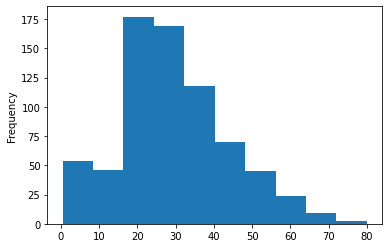

In [25]:
import matplotlib.pyplot as plt
df['Age'].plot(kind='hist')

<AxesSubplot:>

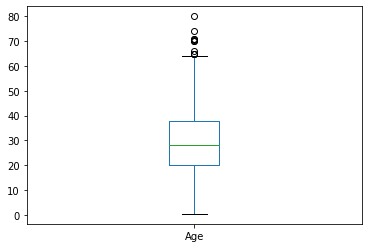

In [26]:
df['Age'].plot(kind='box')

In [32]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [36]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
df['Embarked'].fillna('S',inplace=True)

In [40]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

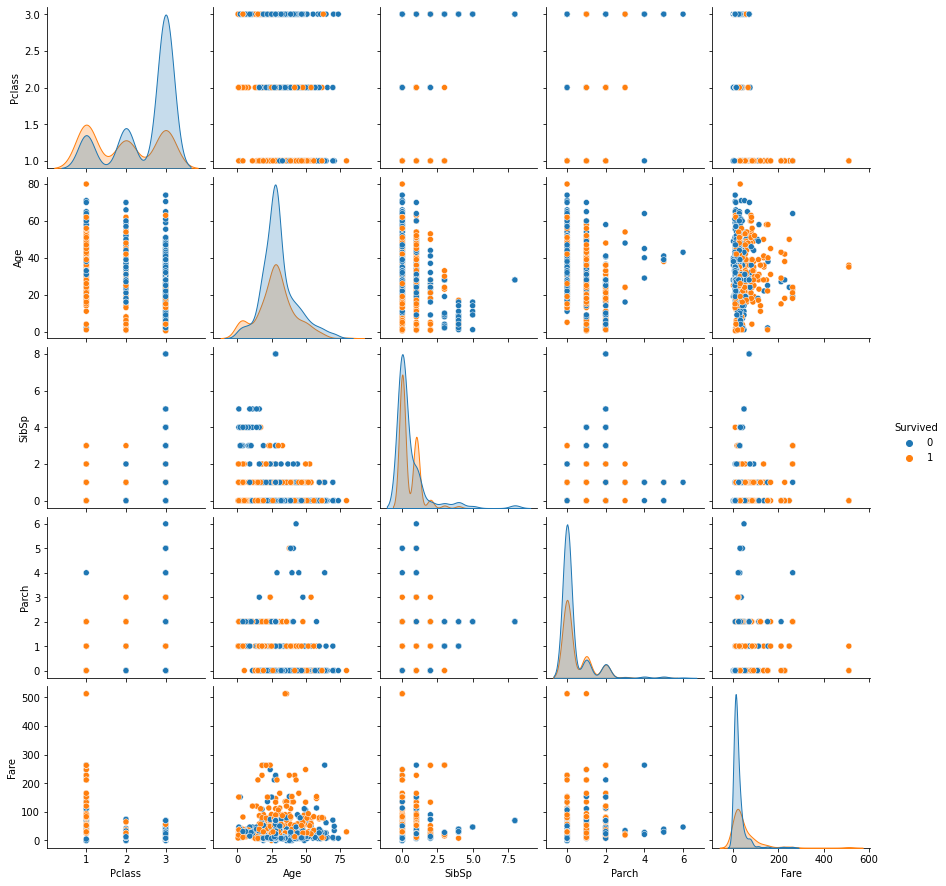

In [42]:
import seaborn as sns
sns.pairplot(df,hue = 'Survived')

In [43]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [44]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

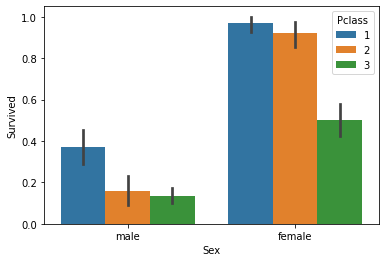

In [50]:
ax = sns.barplot(x="Sex", y="Survived", data=df,hue='Pclass')

<AxesSubplot:ylabel='Frequency'>

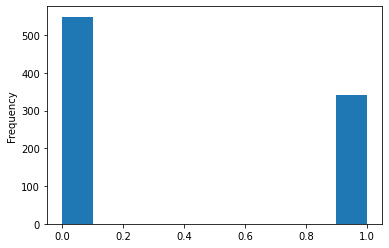

In [49]:
df['Survived'].plot(kind='hist')

In [ ]:
### 1 -Yes -survied
#### 0 - NO -not survived

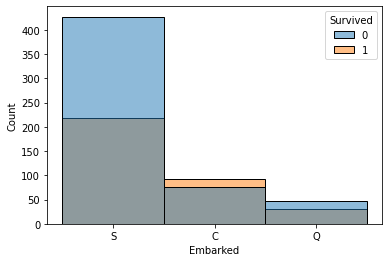

In [54]:
ax = sns.histplot(x="Embarked", data=df,hue='Survived')

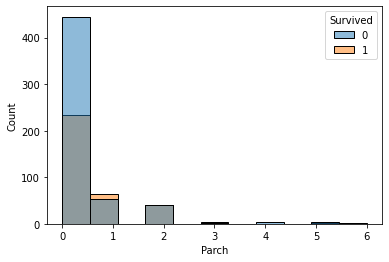

In [55]:
ax = sns.histplot(x="Parch", data=df,hue='Survived')

In [56]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [58]:
df = pd.get_dummies(df,drop_first=True)

In [59]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<AxesSubplot:>

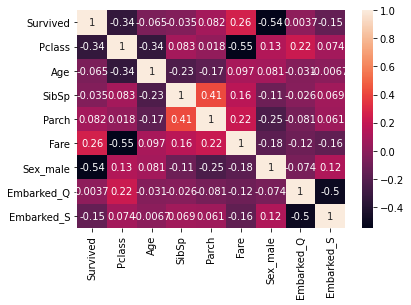

In [63]:
sns.heatmap(df.corr(),annot=True)

In [64]:
y = df['Survived']
X = df.drop(['Survived'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train_scaled  = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled,y_train)
pred_y = clf_lr.predict(x_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y))
print(clf_lr.score(X_train_scaled,y_train))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       181
           1       0.60      0.60      0.60        87

    accuracy                           0.74       268
   macro avg       0.71      0.70      0.71       268
weighted avg       0.74      0.74      0.74       268

0.8170144462279294
[[147  34]
 [ 35  52]]
0.7425373134328358


In [66]:
from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train_scaled,y_train)
y_pred = ex_decision.predict(x_test_scaled)
print(ex_decision.score(X_train_scaled,y_train))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_y))
print(classification_report(y_test, y_pred))

0.9903691813804173
[[147  34]
 [ 35  52]]
0.7425373134328358
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       181
           1       0.60      0.71      0.65        87

    accuracy                           0.75       268
   macro avg       0.72      0.74      0.73       268
weighted avg       0.77      0.75      0.75       268



In [69]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=10)
model5.fit(X_train_scaled, y_train)
y_pred5 = model5.predict(x_test_scaled)
print(classification_report(y_test, y_pred5))
print(accuracy_score(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       181
           1       0.67      0.77      0.72        87

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.81      0.80      0.81       268

0.8022388059701493


In [71]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(x_test_scaled)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       181
           1       0.68      0.72      0.70        87

    accuracy                           0.80       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.81      0.80      0.80       268

0.8022388059701493
